<a href="https://colab.research.google.com/github/EsterAlvex/DataFrameTitanic/blob/main/ProjetoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ProjetoTitanic/titanic.csv")
display(df)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


 **Questionamento1: Qual a probabilidade condicional de uma pessoa sobreviver,tendo em vista o sexo e a classe do passageiro?**

In [ ]:
#dataframe para arkazenar as probabilidades
prob_df = pd.DataFrame(columns=['Sexo', 'Classe', 'Probabilidade de Sobrevivência'])

#calculo das probabilidades
prob_feminina_class1 = df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]['Survived'].mean()
prob_feminina_class2 = df[(df['Sex'] == 'female') & (df['Pclass'] == 2)]['Survived'].mean()
prob_feminina_class3 = df[(df['Sex'] == 'female') & (df['Pclass'] == 3)]['Survived'].mean()

prob_masculina_class1 = df[(df['Sex'] == 'male') & (df['Pclass'] == 1)]['Survived'].mean()
prob_masculina_class2 = df[(df['Sex'] == 'male') & (df['Pclass'] == 2)]['Survived'].mean()
prob_masculina_class3 = df[(df['Sex'] == 'male') & (df['Pclass'] == 3)]['Survived'].mean()

# adicionando os resultados ao DataFrame
prob_df.loc[0] = ['Feminino', 1, prob_feminina_class1]
prob_df.loc[1] = ['Feminino', 2, prob_feminina_class2]
prob_df.loc[2] = ['Feminino', 3, prob_feminina_class3]
prob_df.loc[3] = ['Masculino', 1, prob_masculina_class1]
prob_df.loc[4] = ['Masculino', 2, prob_masculina_class2]
prob_df.loc[5] = ['Masculino', 3, prob_masculina_class3]
display(prob_df)

,Sexo,Classe,Probabilidade de Sobrevivência
0,Feminino,1,0.968085
1,Feminino,2,0.921053
2,Feminino,3,0.500000
3,Masculino,1,0.368852
4,Masculino,2,0.157407
5,Masculino,3,0.137026


In [ ]:
#gráfico interativo
fig = px.bar(prob_df, x='Classe', y='Probabilidade de Sobrevivência', color='Sexo',
             barmode='group', title='Probabilidade de Sobrevivência por Sexo e Classe',
             labels={'Probabilidade de Sobrevivência': 'Probabilidade'})

fig.show()

**Questionamento2: Qual é a probabilidade das crianças de cada classe e que tem 10 anos ou menos de sobreviver?**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ProjetoTitanic/titanic.csv")

# Função para calcular a probabilidade de sobrevivência para uma classe específica
def probabilidade_sobrevivencia_classe(df, classe):
    # Filtrar crianças na classe especificada com 10 anos ou menos
    children_class = df[(df['Age'] <= 10) & (df['Pclass'] == classe)]

    # Número de crianças que sobreviveram e não sobreviveram
    survived = children_class['Survived'].sum()
    not_survived = len(children_class) - survived

    # Parâmetros da distribuição Beta
    alpha = survived + 1
    beta_param = not_survived + 1

    # Calcular a probabilidade média de sobrevivência
    mean_survival_prob = alpha / (alpha + beta_param)

    # Retornar os resultados
    return {
        'Classe': classe,
        'Número de crianças que sobreviveram': survived,
        'Número de crianças que não sobreviveram': not_survived,
        'Parâmetro Alpha (α)': alpha,
        'Parâmetro Beta (β)': beta_param,
        'Distribuição Beta': f'Beta({alpha}, {beta_param})',
        'Probabilidade Média de Sobrevivência': f'{mean_survival_prob:.2f}'
    }

# Lista para armazenar os resultados de todas as classes
resultados = []

# Calculo para cada classe (1, 2, 3)
for classe in [1, 2, 3]:
    resultados.append(probabilidade_sobrevivencia_classe(df, classe))

resultados_df = pd.DataFrame(resultados)

display(resultados_df)

,Classe,Número de crianças que sobreviveram,Número de crianças que não sobreviveram,Parâmetro Alpha (α),Parâmetro Beta (β),Distribuição Beta,Probabilidade Média de Sobrevivência
0,1,2,1,3,2,"Beta(3, 2)",0.60
1,2,17,0,18,1,"Beta(18, 1)",0.95
2,3,22,31,23,32,"Beta(23, 32)",0.42


In [ ]:
fig = px.bar(resultados_df, x='Classe', y='Probabilidade Média de Sobrevivência',
             text='Probabilidade Média de Sobrevivência', labels={'Classe': 'Classe', 'Probabilidade Média de Sobrevivência': 'Probabilidade Média'},
             title='Probabilidade Média de Sobrevivência por Classe', color='Classe')

fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.show()

**Questionamento3: Quanto é que as pessoas pagavam para estar no navio? Cálculo da  expectativa de passagem condicionada à classe de passageiros**

In [ ]:
#expectativa de tarifa por classe

passagem_class1 = df[df['Pclass'] == 1]['Fare'].mean()
passagem_class2 = df[df['Pclass'] == 2]['Fare'].mean()
passagem_class3 = df[df['Pclass'] == 3]['Fare'].mean()

passagem_df = pd.DataFrame({
    'Classe': [1, 2, 3],
    'Passagem Média (E[X | C])': [passagem_class1, passagem_class2, passagem_class3]
})

display(passagem_df)

,Classe,Passagem Média (E[X | C])
0,1,84.154687
1,2,20.662183
2,3,13.707707


In [ ]:
#gráfico interativo
fig = px.bar(passagem_df, x='Classe', y='Passagem Média (E[X | C])',
             title='Expectativa de Tarifa por Classe',
             labels={'Passagem Média (E[X | C])': 'Tarifa Média'},
             text='Passagem Média (E[X | C])')
fig.show()

**Questionamento4: Qual a taxa de sobrevivência por idade e sexo dos passageiros?**

In [ ]:
bins = [0, 12, 18, 30, 50, 80]
labels = ["Criança", "Adolescente", "Jovem Adulto", "Adulto", "Idoso"]
df["Faixa Etária"] = pd.cut(df["Age"], bins=bins, labels=labels)

#taxa de sobrevivência por faixa etária e sexo
taxa_sobrevivencia = df.groupby(["Faixa Etária", "Sex"])["Survived"].mean().unstack()

display(taxa_sobrevivencia)

<ipython-input-16-4caa19d68986>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Sex,female,male
Faixa Etária,,
Criança,0.526316,0.560976
Adolescente,0.738095,0.088889
Jovem Adulto,0.750000,0.141700
Adulto,0.788462,0.220430
Idoso,0.888889,0.111111


In [ ]:
import plotly.express as px

taxa_sobrevivencia = pd.DataFrame({
    "Faixa Etária": ["Criança", "Adolescente", "Jovem Adulto", "Adulto", "Idoso"],
    "Feminino": [0.526, 0.738, 0.750, 0.788, 0.889],
    "Masculino": [0.561, 0.089, 0.142, 0.220, 0.111]
})

# Converter para formato longo
taxa_sobrevivencia = taxa_sobrevivencia.melt(id_vars="Faixa Etária",
                                             var_name="Sexo",
                                             value_name="Taxa de Sobrevivência")

# gráfico interativo com Plotly
fig = px.bar(taxa_sobrevivencia, x="Faixa Etária", y="Taxa de Sobrevivência",
             color="Sexo", barmode="group",
             title="Taxa de Sobrevivência por Faixa Etária e Sexo",
             labels={"Taxa de Sobrevivência": "Sobrevivência (%)"},
             color_discrete_map={"Feminino": "#ff69b4", "Masculino": "#1f77b4"})

fig.show()


**Questão5: Qual o número de passageiros sobreviventes?**

Sobreviventes     : 342
Não Sobreviventes : 545


Text(0, 0.5, '')

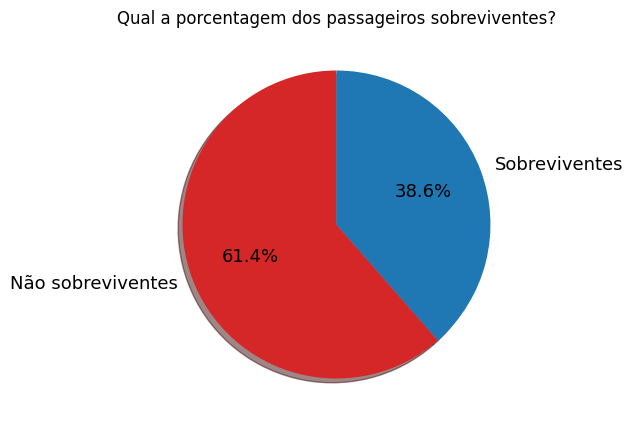

In [11]:
df['Not Survived'] = df['Survived'].map({0:1,1:0})
#Conta os valores encontrados de sobreviventes e não sobreviventes e exibe na tela
print('Sobreviventes     :', df['Survived'].value_counts()[1])
print('Não Sobreviventes :', df['Survived'].value_counts()[0])
#Gera o grafico
df['Survived'].value_counts().plot.pie(colors=('tab:red', 'tab:blue'),title='Qual a porcentagem dos passageiros sobreviventes?',fontsize=13, shadow=True,startangle=90,autopct='%1.1f%%',
labels=('Não sobreviventes','Sobreviventes'),
figsize=(5,5)).set_ylabel('')

In [ ]:
titanic['Not Survived'] = titanic['Survived'].map({0:1,1:0})
#Conta os valores encontrados de sobreviventes e não sobreviventes e exibe na tela
print('Sobreviventes     :', titanic['Survived'].value_counts()[1])
print('Não Sobreviventes :', titanic['Survived'].value_counts()[0])
#Gera o grafico
titanic['Survived'].value_counts().plot.pie(colors=('tab:red', 'tab:blue'),title='Qual a porcentagem dos passageiros sobreviventes?',fontsize=13, shadow=True,startangle=90,autopct='%1.1f%%',
labels=('Não sobreviventes','Sobreviventes'),
figsize=(5,5)).set_ylabel('')

**1. Apresente em tela toda a base de dados**

In [ ]:
print("1) Base de dados completa:")
display(df)

#O comando display(df) exibe todo o conteúdo do DataFrame.
#Se o DataFrame for muito grande, ele pode ser truncado para facilitar a visualização.

**2. Apresente o tamanho do DataFrame (quantas colunas x linhas)**

In [ ]:
print(f"O DataFrame possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

#O atributo shape retorna uma tupla com o número de linhas e colunas do DataFrame.
#df.shape[0] é o número de linhas, e df.shape[1] é o número de colunas.

O DataFrame possui 887 linhas e 8 colunas.


**3. Acesse a linha (x) e apresente em tela todas as características do item**

In [ ]:
# Acessar uma linha específica (onde em x, a gente vai colocar o numereo da linha que quisermos acessar)
x = 10  # Exemplo: acessar a linha 10
display(df.iloc[x])

#O método iloc é usado para acessar uma linha pelo índice.



,10
Survived,1
Pclass,3
Name,Miss. Marguerite Rut Sandstrom
Sex,female
Age,4.0
Siblings/Spouses Aboard,1
Parents/Children Aboard,1
Fare,16.7


**4. Verifique se o DataFrame está vazio**

In [ ]:
print("4) Verificação se o dataframe está vazio:")
if df.empty:
    print("O dataframe está vazio.")
else:
    print("O dataframe não está vazio.")

4) Verificação se o dataframe está vazio:
O dataframe não está vazio.


**5. Apresente em tela os 5 primeiros registros da base de dados**

In [ ]:
print("5) Primeiros 5 registros:")
display(df.head(5))

5) Primeiros 5 registros:


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


**6. Exclua um item (linha) da base de dados**

In [ ]:
df = df.drop(x) #no x eu escolho qual linha quero excluir

**7. Adicione um item (linha) na base de dados**

In [ ]:
novo_item = {
    'Survived': 1,
    'Pclass': 2,
    'Name': 'Novo Passageiro',
    'Sex': 'male',
    'Age': 25,
    'Siblings/Spouses Aboard': 0,
    'Parents/Children Aboard': 0,
    'Fare': 10.5
}

df = df.append(novo_item, ignore_index=True)
display(df)

#O método append() adiciona uma nova linha ao DataFrame.
#O ignore_index=True garante que o índice seja reorganizado.

**8. Transponha a coluna para a linha na base de dados**

In [ ]:
dataframe_transposed = dataframe.T
print("8) Transposição da coluna para a linha:")
print(dataframe_transposed)
df = df.transpose()

#O atributo .T realiza a transposição do DataFrame, transformando colunas em linhas e vice-versa.

**9. Apresente em tela somente a 1ª e a 2ª coluna (rótulo) da base de dados**

In [ ]:
print("9) 1ª e 2ª coluna:")
print(dataframe.iloc[:, :2])
print(seu_dataframe.iloc[:, 0:2])

**10. Informe como foi desenvolvido o Projeto e comente um gráfico gerado**

O projeto foi desenvolvido utilizando a linguagem Python e a biblioteca pandas para manipulação e análise de dados. A base de dados utilizada foi o titanic.csv, que contém informações sobre os passageiros do Titanic. As principais etapas do projeto incluíram:

    Carregamento e limpeza dos dados.

    Análise exploratória para entender a distribuição das variáveis.

    Cálculo de probabilidades condicionais e expectativas.

    Visualização de dados para identificar padrões.